In [3]:
#importing libraries
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.utils.validation import column_or_1d

In [4]:
"""
CSV_PATH = "complete-frame.csv"

frame = pd.read_csv(CSV_PATH, sep=",")

columns = [frame.mutation,frame.no_mutations, frame.line_coverage, frame.isAssertionRoulette, frame.isEagerTest, frame.isLazyTest,
frame.isMysteryGuest, frame.isSensitiveEquality, frame.isResourceOptimism, frame.isForTestersOnly,
frame.isIndirectTesting, frame.LOC_prod, frame.HALSTEAD_prod, frame.RFC_prod, frame.CBO_prod, frame.MPC_prod, frame.IFC_prod, frame.DAC_prod,frame.DAC2_prod, frame.LCOM1_prod, frame.LCOM2_prod,
frame.LCOM3_prod, frame.LCOM4_prod, frame.CONNECTIVITY_prod, frame.LCOM5_prod, frame.COH_prod, frame.TCC_prod,
frame.LCC_prod, frame.ICH_prod, frame.WMC_prod, frame.NOA_prod, frame.NOPA_prod, frame.NOP_prod,
frame.McCABE_prod, frame.BUSWEIMER_prod, frame.LOC_test, frame.HALSTEAD_test, frame.RFC_test, frame.CBO_test,
frame.MPC_test, frame.IFC_test, frame.DAC_test, frame.DAC2_test, frame.LCOM1_test, frame.LCOM2_test,
frame.LCOM3_test, frame.LCOM4_test, frame.CONNECTIVITY_test, frame.LCOM5_test, frame.COH_test, frame.TCC_test,
frame.LCC_test, frame.ICH_test, frame.WMC_test, frame.NOA_test, frame.NOPA_test, frame.NOP_test, frame.McCABE_test,
frame.BUSWEIMER_test, frame.csm_CDSBP, frame.csm_CC, frame.csm_FD, frame.csm_Blob, frame.csm_SC, frame.csm_MC,
frame.csm_LM, frame.csm_FE, frame.prod_readability, frame.test_readability]
    
frame = pd.concat(columns, axis = 1)

x = pd.concat([frame.no_mutations #, frame.line_coverage,
               ,frame.isAssertionRoulette, frame.isEagerTest, frame.isLazyTest,
frame.isMysteryGuest, frame.isSensitiveEquality, frame.isResourceOptimism, frame.isForTestersOnly,
frame.isIndirectTesting, frame.LOC_prod, frame.HALSTEAD_prod, frame.RFC_prod, frame.CBO_prod, frame.MPC_prod, frame.IFC_prod, frame.DAC_prod,frame.DAC2_prod, frame.LCOM1_prod, frame.LCOM2_prod,
frame.LCOM3_prod, frame.LCOM4_prod, frame.CONNECTIVITY_prod, frame.LCOM5_prod, frame.COH_prod, frame.TCC_prod,
frame.LCC_prod, frame.ICH_prod, frame.WMC_prod, frame.NOA_prod, frame.NOPA_prod, frame.NOP_prod,
frame.McCABE_prod, frame.BUSWEIMER_prod, frame.LOC_test, frame.HALSTEAD_test, frame.RFC_test, frame.CBO_test,
frame.MPC_test, frame.IFC_test, frame.DAC_test, frame.DAC2_test, frame.LCOM1_test, frame.LCOM2_test,
frame.LCOM3_test, frame.LCOM4_test, frame.CONNECTIVITY_test, frame.LCOM5_test, frame.COH_test, frame.TCC_test,
frame.LCC_test, frame.ICH_test, frame.WMC_test, frame.NOA_test, frame.NOPA_test, frame.NOP_test, frame.McCABE_test,
frame.BUSWEIMER_test, frame.csm_CDSBP, frame.csm_CC, frame.csm_FD, frame.csm_Blob, frame.csm_SC, frame.csm_MC,
frame.csm_LM, frame.csm_FE, frame.prod_readability, frame.test_readability], axis = 1)

y = pd.concat([frame.mutation], axis = 1)
"""

#Join CSVs

CSV_PATH = "complete-frame.csv"

CSV_PATH1 = "testminereffectiveness.csv"

def label_race (row):
    return row['path_test'].split('/')[len(row['path_test'].split('/')) - 1].split('.')[0]

frame1 = pd.read_csv(CSV_PATH, sep=',')
frame1 = frame1.sample(frac=1).reset_index(drop=True) 

frame1['TestClassName'] = frame1.apply(lambda row: label_race(row), axis=1)

frame2 = pd.read_csv(CSV_PATH1, sep=',')

frame = pd.merge(frame1, frame2, on='TestClassName')

frame = frame.drop(['project', 'module', 'path_test','test_name','path_src',
                    'class_name','TestClassName','commit','Nº','Project'], axis=1)




In [5]:
frame.head()

,mutation,no_mutations,line_coverage,isAssertionRoulette,isEagerTest,isLazyTest,isMysteryGuest,isSensitiveEquality,isResourceOptimism,isForTestersOnly,...,Mockito,BadApi,LOC,Expressions,Depth,Vocabulary,Understandability,BodySize,Dexterity,NonWhiteCharacters
0,0.716102,236,0.865385,0,1,0,1,1,0,0,...,0.0,0.0,147.0,292.0,11.0,66.0,2738.0,360.0,3.0,2148.0
1,0.700000,80,0.945946,0,0,0,0,0,0,0,...,0.0,0.0,139.0,337.0,14.0,79.0,3710.0,413.0,3.0,3347.0
2,0.927536,69,0.975000,0,0,0,0,0,0,0,...,0.0,0.0,205.0,453.0,10.0,62.0,3886.0,492.0,4.0,6841.0
3,0.475000,320,1.000000,0,0,0,0,0,0,0,...,0.0,0.0,163.0,365.0,11.0,49.0,3631.0,502.0,2.0,3940.0
4,0.126332,657,0.236559,1,1,0,0,1,0,0,...,0.0,1.0,225.0,662.0,11.0,57.0,5734.0,765.0,3.0,4777.0


In [6]:
print(frame.shape)

(2245, 84)


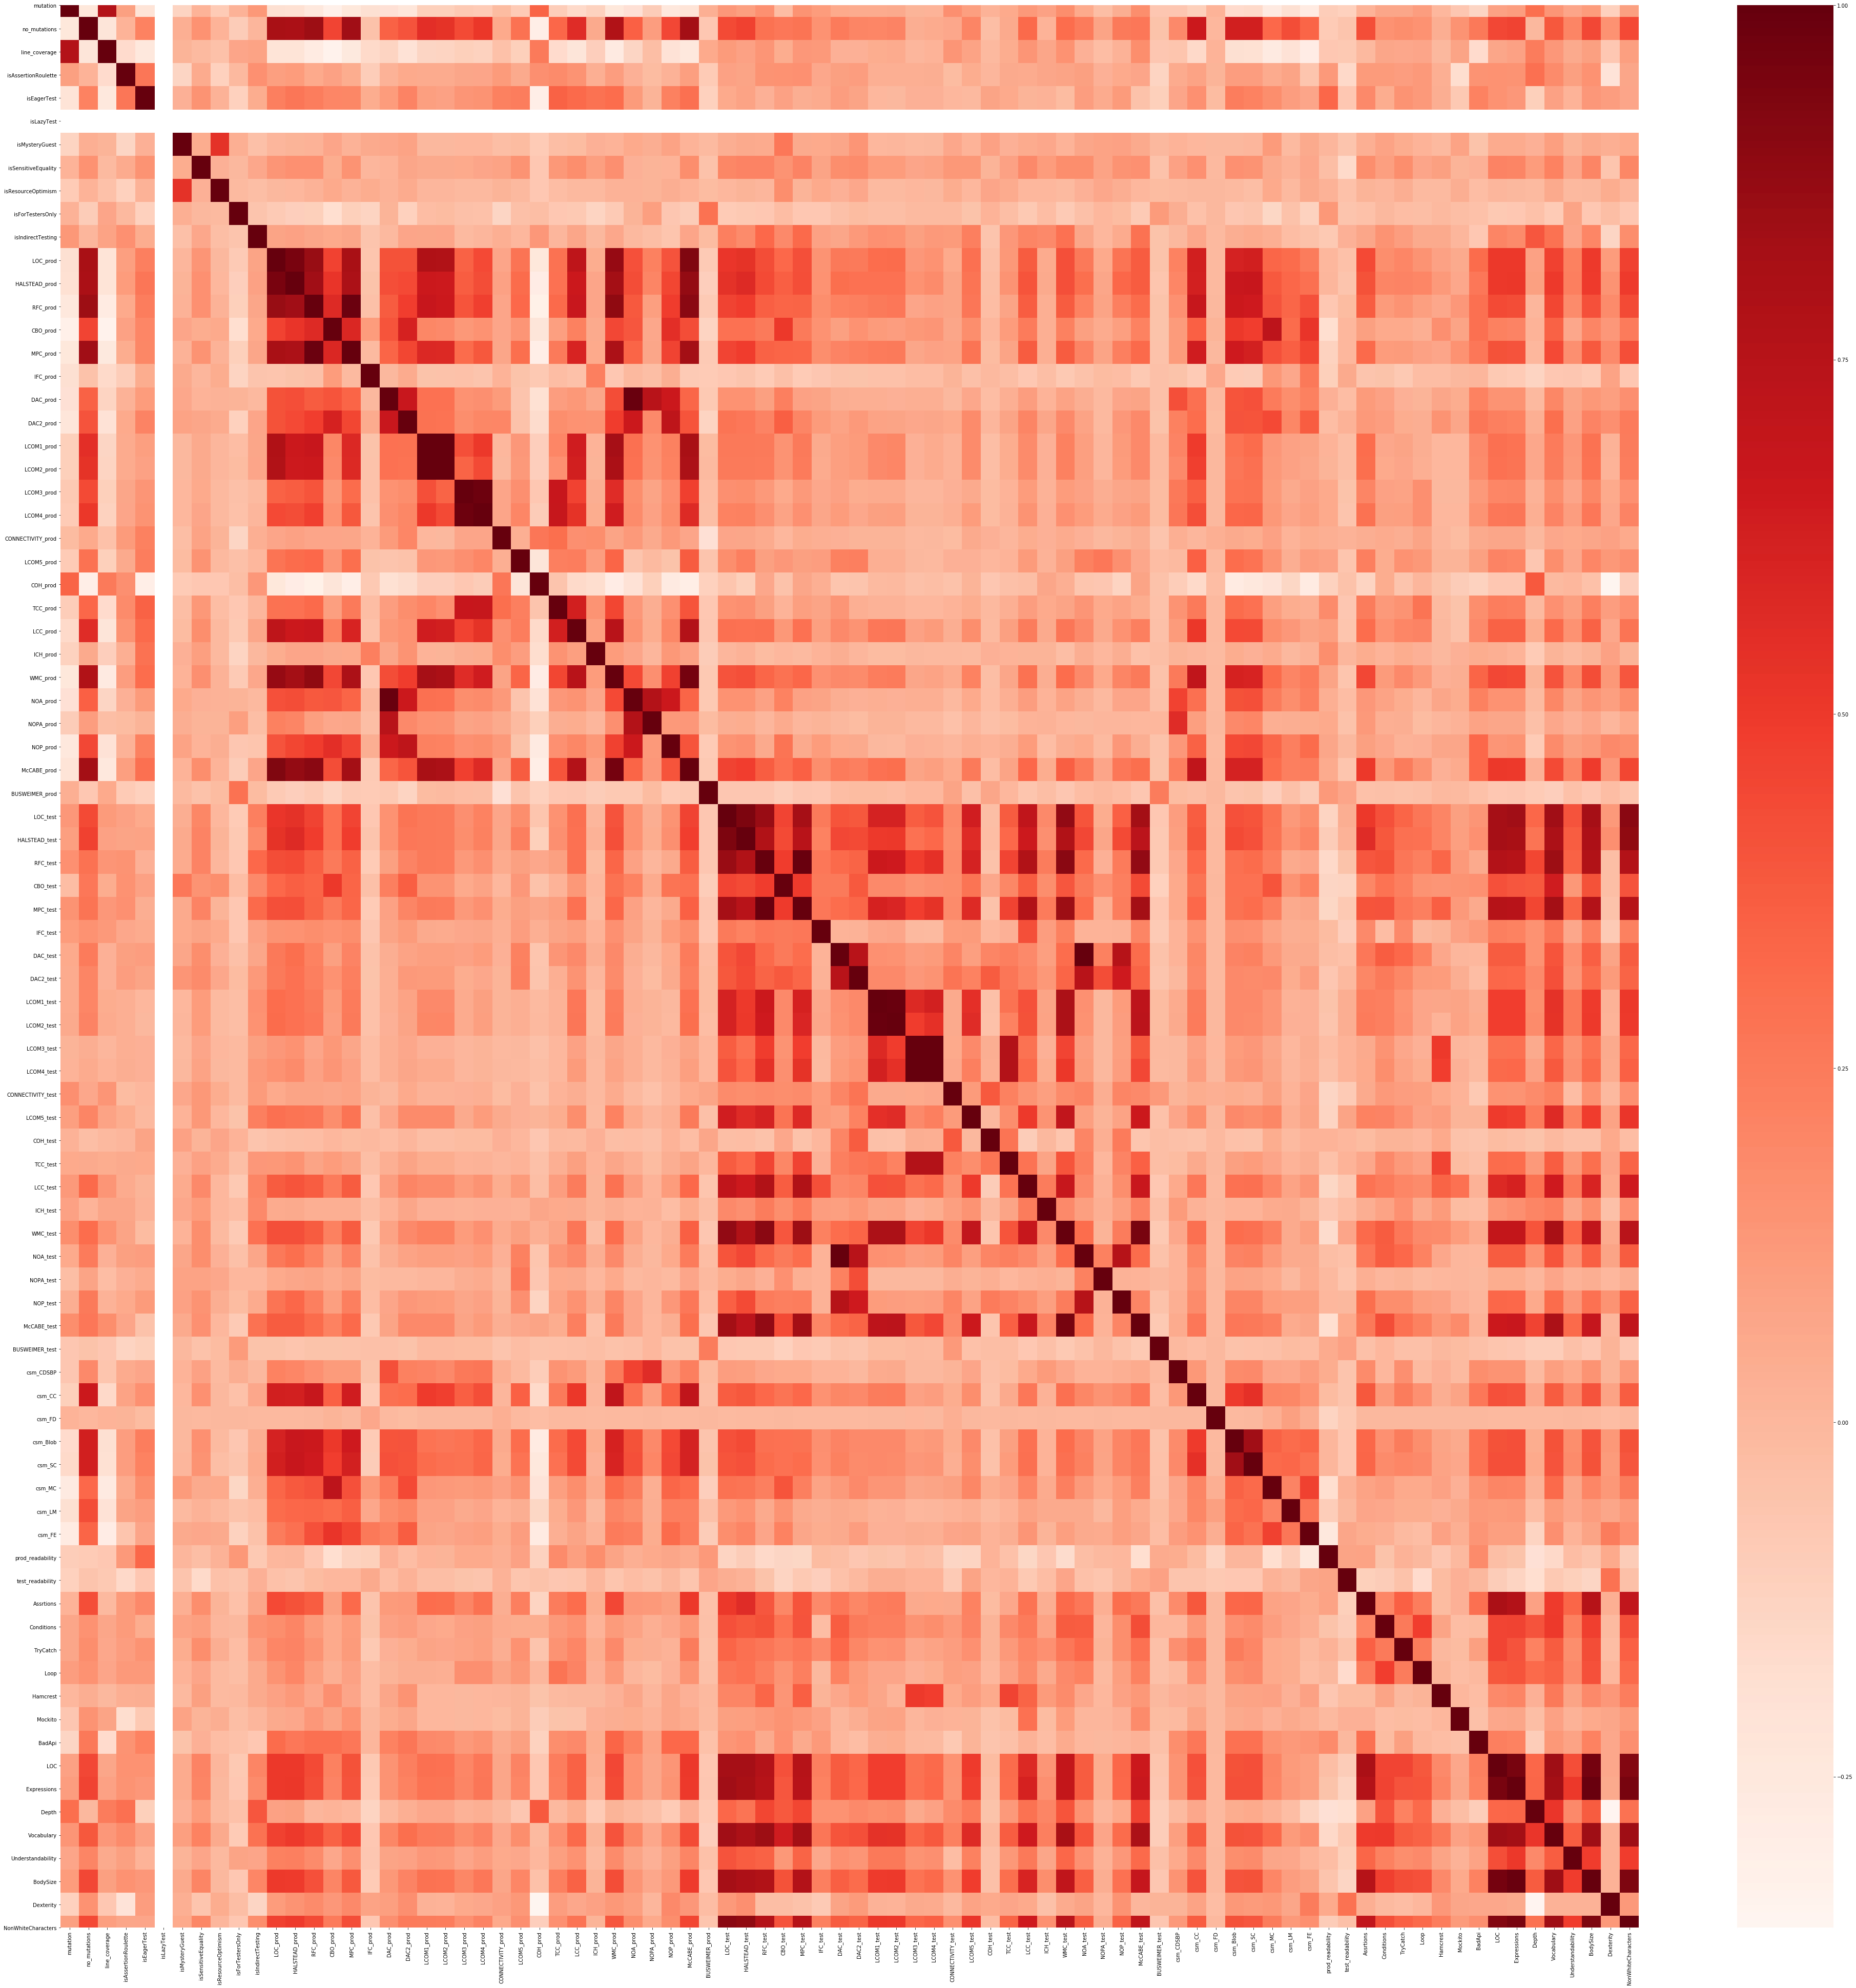

In [7]:
#Using Pearson Correlation
plt.figure(figsize=(69,69))
cor = frame.corr()
sns.heatmap(cor, annot=False, cmap=plt.cm.Reds)
plt.show()

In [27]:
#Correlation with output variable
cor_target = abs(cor["mutation"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target<0.1]
relevant_features

isAssertionRoulette    0.099106
isSensitiveEquality    0.015741
isResourceOptimism     0.090092
isForTestersOnly       0.024019
LCOM3_prod             0.079452
LCOM4_prod             0.088627
CONNECTIVITY_prod      0.018089
LCOM5_prod             0.090498
TCC_prod               0.097050
NOPA_prod              0.093969
BUSWEIMER_prod         0.033070
CBO_test               0.027793
DAC_test               0.057248
DAC2_test              0.049394
LCOM1_test             0.049655
LCOM2_test             0.052609
LCOM3_test             0.009707
LCOM4_test             0.017838
LCOM5_test             0.099581
COH_test               0.019773
TCC_test               0.061514
ICH_test               0.092969
NOA_test               0.057248
NOPA_test              0.032306
NOP_test               0.037270
BUSWEIMER_test         0.066653
csm_CDSBP              0.070086
csm_FD                 0.015627
prod_readability       0.098551
Assrtions              0.016395
Conditions             0.070846
TryCatch

In [19]:
x = frame.drop(['mutation'], axis=1)
y = pd.concat([frame.mutation], axis = 1)

x = x.fillna(0)
y = column_or_1d(y, warn=False)
    
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 10)
#Transforming data using RFE
X_rfe = rfe.fit_transform(x,y)  
#Fitting the data to model
model.fit(X_rfe,y)
print(rfe.support_)
print(rfe.ranking_)

[False  True  True False False  True False  True  True False False False
 False False False False False False False False False False False False
  True False False False False False False False False  True False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False  True False  True  True False False False False
 False False False False False False False False False False False]
[50  1  1 11 74  1  9  1  1 12 57 69 47 35 46 27 24 14 52 53 54 71  6 31
  1 33 32 26 51 25 21 23 59  1 55 72 44 19 43 63 45 30 68 67 58 66  4 39
 10 36 38 18 37 41 22 20 65 34  2 13 16  8  7  3  1 15  1  1 49 28 42 29
 60 17 48 62 64 56 40 73 61  5 70]


In [30]:
#no of features
nof_list=np.arange(1,13)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 0)
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 12
Score with 12 features: 0.651609


In [33]:
cols = list(x.columns)
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 5)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(x,y)  
#Fitting the data to model
model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['line_coverage', 'isAssertionRoulette', 'isMysteryGuest', 'COH_prod',
       'prod_readability'],
      dtype='object')


In [ ]:
#Join CSVs

CSV_PATH = "complete-frame.csv"

CSV_PATH1 = "testminereffectiveness.csv"

def label_race (row):
    return row['path_test'].split('/')[len(row['path_test'].split('/')) - 1].split('.')[0]

frame1 = pd.read_csv(CSV_PATH, sep=',')
frame1 = frame.sample(frac=1).reset_index(drop=True) 

frame1['TestClassName'] = frame1.apply(lambda row: label_race(row), axis=1)

frame2 = pd.read_csv(CSV_PATH1, sep=',')

result = pd.merge(frame1, frame2, on='TestClassName')

result.drop(['project', 'module', 'path_test','test_name','path_src','class_name','TestClassName','commit'], axis=1)
